# Algoritmos de optimización - Reto 2

Nombre: Naroa Alonso Fernández<br>
Github: <br>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
import random

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

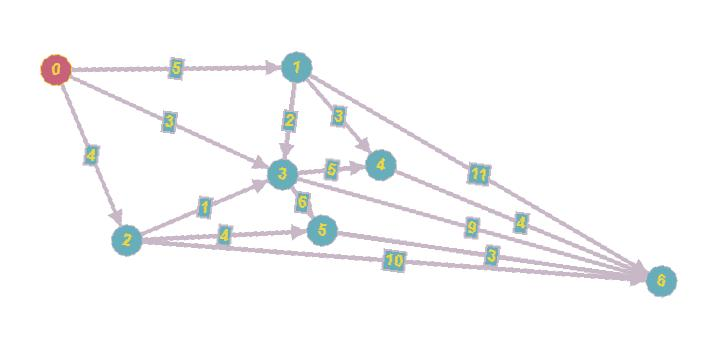

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [ ]:
def viaje_rio_dinamico(n, grafo):
    """
    Resuelve el problema del viaje por el río utilizando programación dinámica.
    - n: Número de embarcaderos
    - grafo: Diccionario con los costes de viaje entre embarcaderos
    - solución : coste mínimo para llegar al último embarcadero y el camino óptimo
    """
    # Inicializamos un array para almacenar el coste mínimo para llegar a cada embarcadero
    dp = [float('inf')] * n
    
    # Lista que almacena el embarcadero previo en la ruta óptima para reconstruir el camino
    camino = [-1] * n  
    
    # El coste para llegar al primer embarcadero (inicio) es 0, ya que empezamos ahí
    dp[0] = 0  
    
    # Programación dinámica: recorremos cada embarcadero y buscamos rutas más baratas
    for i in range(n):
        for j in grafo.get(i, []):  # Recorremos las conexiones desde el embarcadero i
            coste = grafo[i][j]  # Obtenemos el coste del viaje de i a j
            
            # Si la nueva ruta es más barata que la registrada en dp[j], actualizamos
            if dp[i] + coste < dp[j]:
                dp[j] = dp[i] + coste  # Guardamos el menor coste para llegar a j
                camino[j] = i  # Guardamos de dónde venimos para reconstruir la ruta óptima
    
    # Reconstrucción del camino óptimo usando el array `camino`
    ruta = []
    actual = n - 1  # Empezamos desde el último embarcadero
    while actual != -1:
        ruta.append(actual)  # Agregamos el embarcadero actual a la ruta
        actual = camino[actual]  # Retrocedemos en el camino óptimo
    ruta.reverse()  # Invertimos la ruta para que vaya de inicio a fin
    
    return dp[-1], ruta  # Retornamos el coste mínimo y la ruta óptima



In [16]:
# Definir el grafo como un diccionario donde cada clave representa un embarcadero y su valor es otro diccionario con costes de viaje
n = 7  # Número de embarcaderos (nodos)
grafo = {
    0: {1: 5, 2: 4, 3: 3},
    1: {3: 2, 4: 3, 6: 11},
    2: {3: 1, 5: 4, 6: 10},
    3: {4: 5, 5: 6, 6: 9},
    4: {6: 4},
    5: {6: 3}
}

# Resolver el problema usando programación dinámica
coste_minimo, ruta_optima = viaje_rio_dinamico(n, grafo)

# Mostrar resultado
print(f"El coste mínimo para llegar al último embarcadero es: {coste_minimo}")
print(f"Ruta óptima: {' -> '.join(map(str, ruta_optima))}")


El costo mínimo para llegar al último embarcadero es: 11
Ruta óptima: 0 -> 2 -> 5 -> 6


## Descenso del gradiente

In [24]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc
import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [25]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

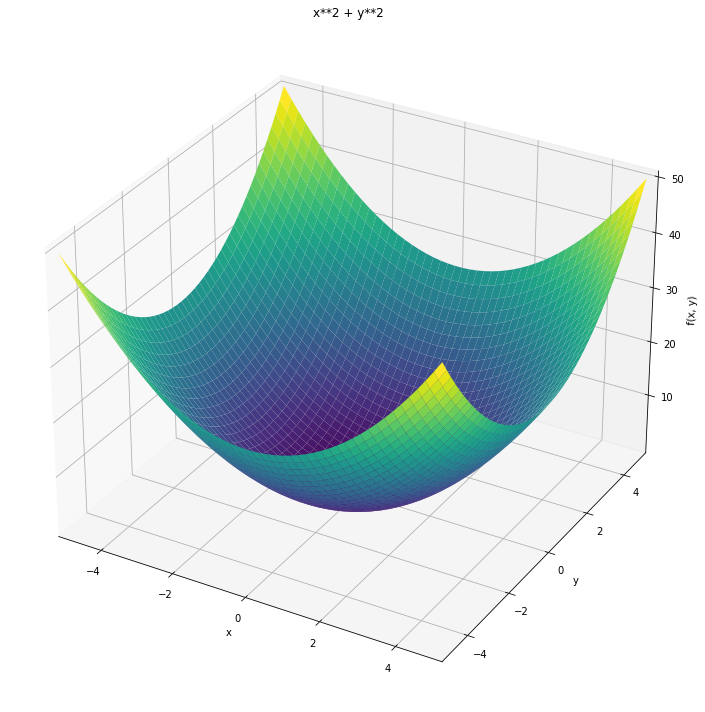

In [26]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

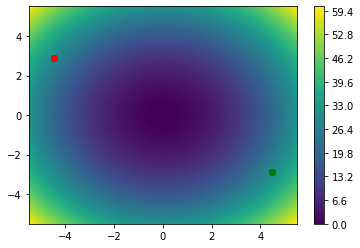

Solucion: [4.472126877392311, -2.888208824237993] 28.341669019900912


In [31]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
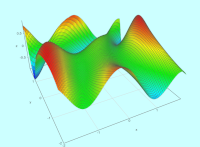


In [7]:
def f(X):
    """
    f(x) = sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)
    """
    return math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

In [8]:
def df(X):
    """
    Gradiente de la función f(x), calculado parcialmente para cada variable.
    """
    df_dx = (X[0] * math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))
             - 2 * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])))
    
    df_dy = (-0.5 * X[1] * math.cos(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))
             - math.exp(X[1]) * math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.sin(2*X[0] + 1 - math.exp(X[1])))
    
    return [df_dx, df_dy]


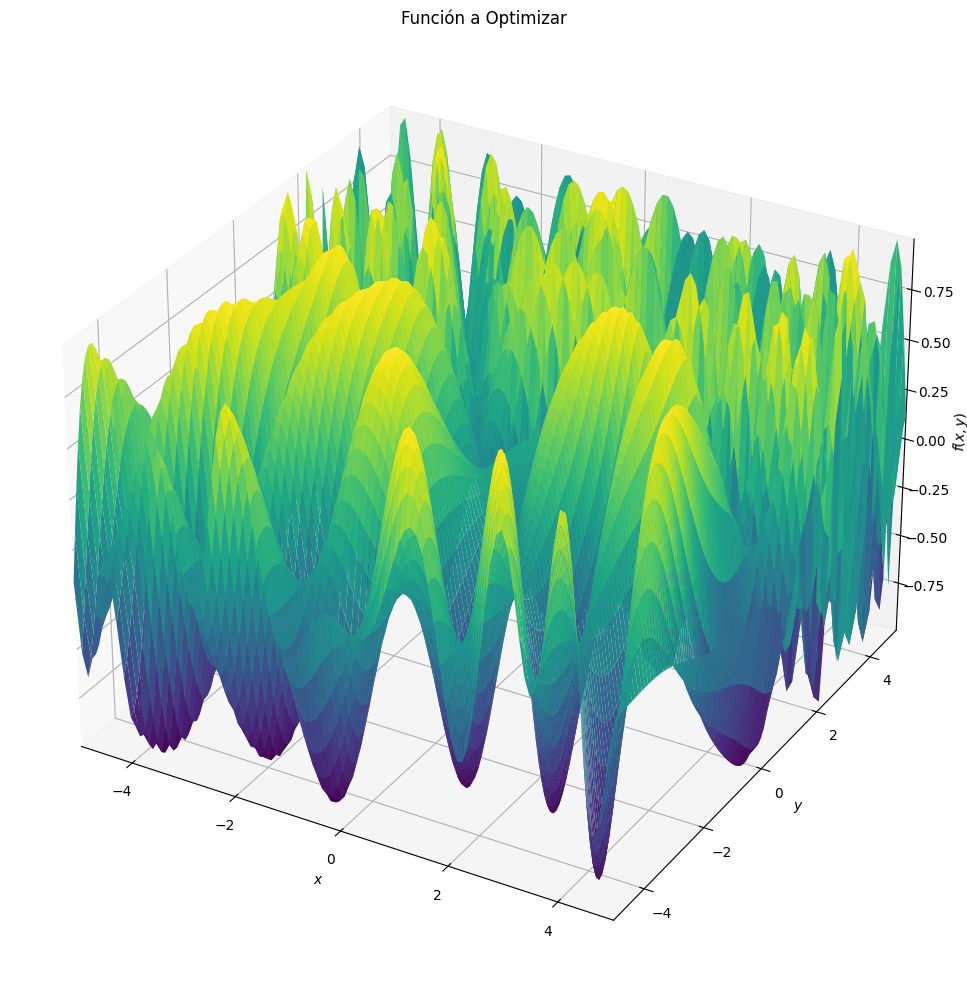

In [14]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d

x, y = symbols('x y')

# Definir la función simbólica
funcion_simbolica = sin(0.5 * x**2 - 0.25 * y**2 + 3) * cos(2*x + 1 - exp(y))

# Graficar la función en 3D
plot3d(funcion_simbolica, (x, -5, 5), (y, -5, 5), title='Función a Optimizar', size=(10, 10))

In [9]:
# Preparar los datos para el mapa de niveles
resolucion = 100
rango = 5.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])


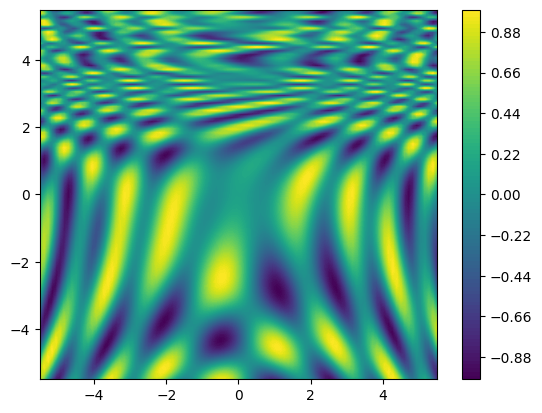

In [10]:
# Pinta el mapa de niveles de la función
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()


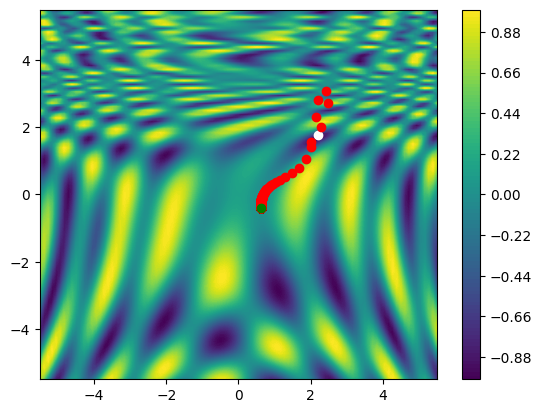

Solución encontrada: [0.6116673773940547, -0.3947460463779105] con valor de función: -0.00013894157687233043


In [13]:
# Pinta el mapa de niveles de la función
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()


# Generamos un punto aleatorio inicial
P = [random.uniform(-5, 5), random.uniform(-5, 5)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje
TA = 0.1

# Iteraciones del algoritmo de descenso del gradiente
for _ in range(1000):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final
plt.plot(P[0], P[1], "o", c="green")
plt.show()

print("Solución encontrada:", P, "con valor de función:", f(P))
